In [8]:
%load_ext autoreload
%autoreload 1
%aimport util
import os

import joblib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from IPython.display import display
from PIL import Image
from tensorflow.keras.layers import Layer
from tensorflow.keras.losses import Loss
from tensorflow.keras.models import Model, Sequential

from util.models import new_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
image_bytes = tf.io.read_file("./data/screw/train/good/004.png") 
img_tensor = tf.image.decode_image(image_bytes)
img_tensor = tf.cast(img_tensor, tf.float32)
img_tensor = tf.image.resize(img_tensor, [200, 200])
width, height, channels = img_tensor.shape

In [66]:
img_tensor = tf.expand_dims(img_tensor, 0)
img_tensor.shape

TensorShape([1, 200, 200, 1])

In [67]:
output = tf.image.sobel_edges(img_tensor)
output_x = np.asarray(output[0, :, :, :, 0])
output_y = np.asarray(output[0, :, :, :, 1])

In [108]:
edge_data = np.sqrt(output_x**2 + output_y**2)

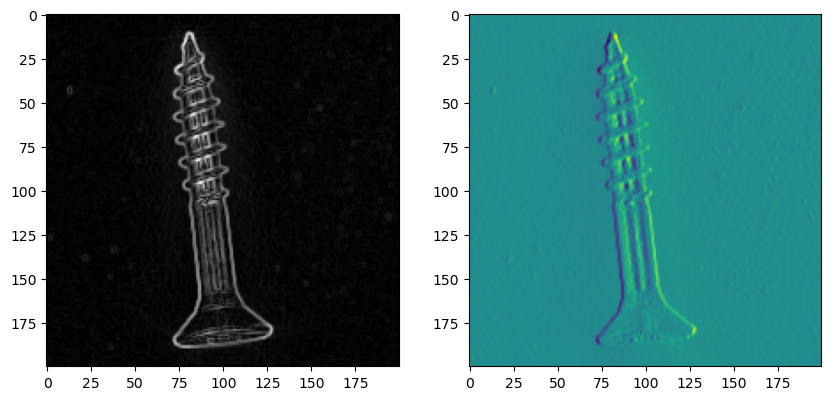

In [113]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(edge_data, cmap='gray')
ax2.imshow(output_y)
plt.show()

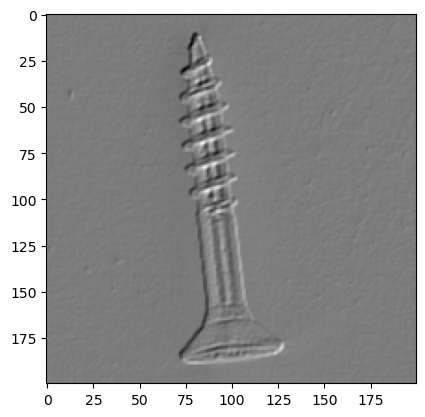

In [69]:
edges = output_x + output_y
plt.imshow(edges, cmap='gray')
plt.show()

(200, 200, 1) <dtype: 'float32'> 
 (200, 200, 1) <dtype: 'float32'>
tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(254.99998, shape=(), dtype=float32)


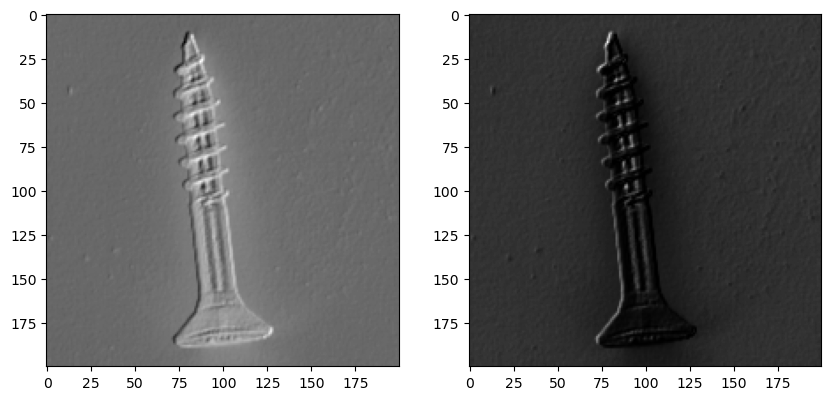

In [107]:
edges_2 = np.asarray(output[0, :, :, 0, :])
empty_channel = np.zeros((width, height, channels), dtype='float')
edges_2 = np.append(edges_2, empty_channel, axis=2)
edges_2 = tf.image.rgb_to_grayscale(edges_2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
new_img = tf.cast(edges_2, dtype=tf.float32)
new_img = new_img + (img_tensor * -1)
zeros = tf.zeros([200, 200, 1], dtype=tf.float32)
last_img = tf.math.squared_difference(zeros, new_img)

last_img = 255 * (last_img - tf.math.reduce_min(last_img)) / tf.math.reduce_max(last_img)

print(new_img.shape, new_img.dtype, "\n", img_tensor.shape, img_tensor.dtype)
print(tf.math.reduce_min(last_img), tf.math.reduce_max(last_img))
# new_img = tf.add(new_img, img_tensor)
ax1.imshow(new_img, cmap='gray')
ax2.imshow(last_img, cmap='gray')